# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x +1

In [3]:
# Make Data

x_1 = np.linspace(start=-3, stop = 3, num= 500)

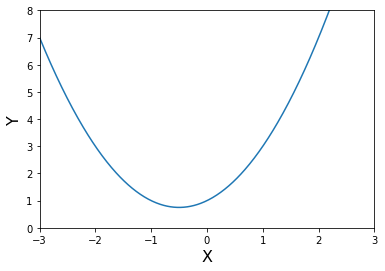

In [4]:
# Plot data

plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize = 16)
plt.ylabel('Y', fontsize = 16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope and Derivatives
challenge: create a python function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2 * x +1

d/dx*x^n =n*x^(n-1) #power rule

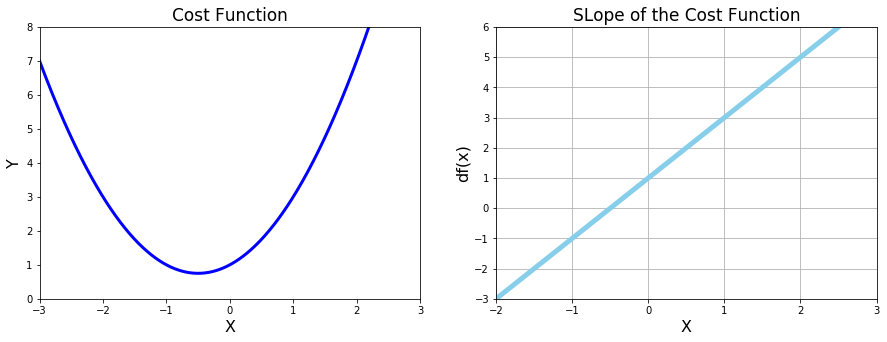

In [6]:
# Plot function and derivative side by side

plt.figure(figsize = [15,5])

# 1 chart: cost function
plt.subplot(1,2,1) # arguements rows, columns , indexes

plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('Y', fontsize = 16)
plt.plot(x_1, f(x_1), color='blue', linewidth = 3)

#2 chart : Derivative
plt.subplot(1,2,2)

plt.title('SLope of the Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])

plt.plot(x_1, df(x_1), color = 'skyblue',linewidth =5)

plt.show()

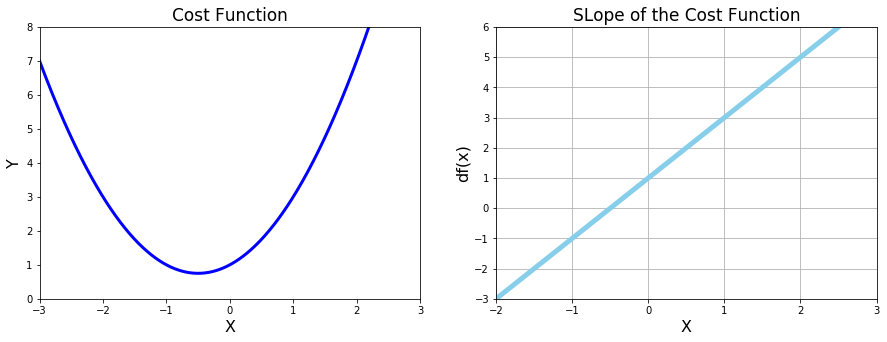

In [7]:
# Plot function and derivative side by side

plt.figure(figsize = [15,5])

# 1 chart: cost function

plt.subplot(1,2,1) # arguements rows, columns , indexes

plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('Y', fontsize = 16)
plt.plot(x_1, f(x_1), color='blue', linewidth = 3)

#2 chart : Derivative
plt.subplot(1,2,2)

plt.title('SLope of the Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])

plt.plot(x_1, df(x_1), color = 'skyblue',linewidth =5)

plt.show()

## Python Loops & Gradient Descent

In [8]:
#simple for loop
for n in range(5):
    print('Hello world', n) #part of the tutorial know all about for loops
print('End of loop')

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
End of loop


In [9]:
#while loops now. also part of the tutorial. Writing down anyway
counter = 0
while counter < 7:
    print('Counting ...', counter)
    counter = counter+1
print('Ready or not, here I come!')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Ready or not, here I come!


In [10]:
# Gradient Descent


# in case you forgot:
# def f(x): return x**2 + x +1

# def df(x): return 2 * x + 1

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
    previous_x = new_x 
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x-previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


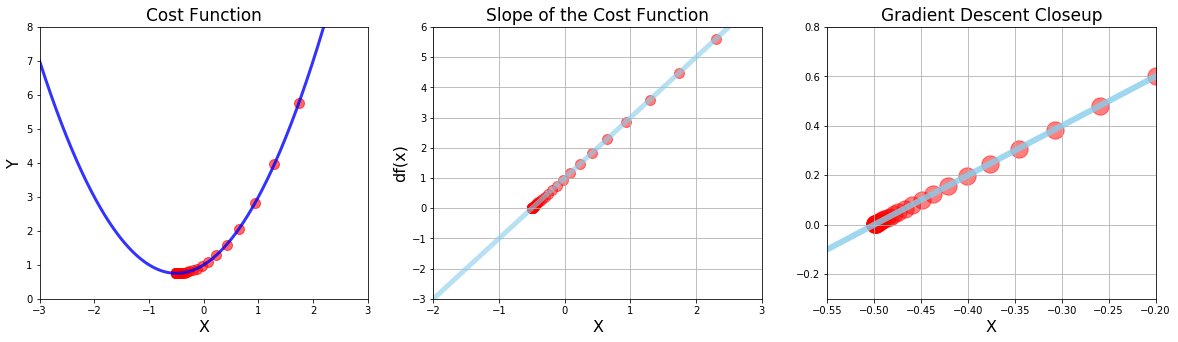

In [11]:
# Superimpose the Gradient Descent calculations on Plot
plt.figure(figsize = [20,5])

# 1 chart: cost function

plt.subplot(1,3,1) 

plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('Y', fontsize = 16)
plt.plot(x_1, f(x_1), color='blue', linewidth = 3, alpha = 0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha = 0.6)

#2 chart : Derivative
plt.subplot(1,3,2)

plt.title('Slope of the Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])

plt.plot(x_1, df(x_1), color = 'skyblue',linewidth =5, alpha = 0.6)

plt.scatter(x_list, slope_list, color="red",s=100, alpha = 0.5)

#3 chart : Derivative (close up)
plt.subplot(1,3,3)

plt.title('Gradient Descent Closeup', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.xlim([-0.55,-0.2])
plt.ylim([-0.3,0.8])

plt.plot(x_1, df(x_1), color = 'skyblue',linewidth =6, alpha = 0.8)

plt.scatter(x_list, slope_list, color="red",s=300, alpha = 0.5)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4X^2 +5$$

In [12]:
# make some data

x_2 = np.linspace(-2,2,1000)

#Challenge write the g(x) function and the dg(x_2)

def g(x):
    return x**4-4*x**2+5
def dg(x):
    return 4*x**3-8*x
    ##d/dxx^n =nx^(n-1) #power rule

https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-1-new/ab-2-5/v/power-rule

This video shows another factor to the power rule. Lets break down the first derivative they show us here. 

$g(x) = x^4 - 4X^2 +5$

Starting with the $x^4$, $x^2$  is the same as 2x^(2-1) or just simply $2x$. So therefore $x^4$ is the same as 4x^(4-1), which is simple $4x^3$.

$4x^2$ is where you might get thrown off all we have to do is MULTIPLY the exponent. 

https://www.youtube.com/watch?v=yJRFdWwo_NM

so $4x^2$ becomes 8x^(2-1) or just $8x$.

finally 5 does not have an x so it becomes a 0 

Remember math is just like programming it's all about knowing the rules. Long as you know what they are, we will figure out an answer eventually. 

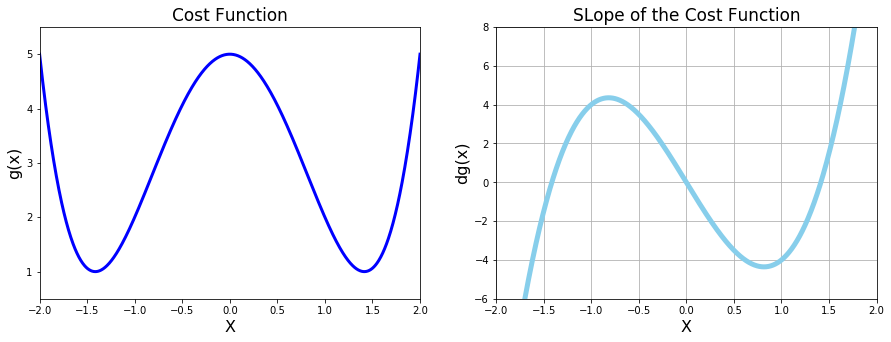

In [13]:
# Plot function and derivative side by side

plt.figure(figsize = [15,5])

# 1 chart: cost function

plt.subplot(1,2,1) # arguements rows, columns , indexes

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2, g(x_2), color='blue', linewidth = 3)

#2 chart : Derivative
plt.subplot(1,2,2)

plt.title('SLope of the Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])

plt.plot(x_2, dg(x_2), color = 'skyblue',linewidth =5)

plt.show()

## Gradient Descent as a Python Function

In [14]:
def gradient_descent(derivative_func,initial_guess,
                     multiplier = 0.02,precision =0.001, max_iter= 300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]


    for n in range(max_iter):
        previous_x = new_x 
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x-previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [15]:
local_min, list_x, deriv_list = gradient_descent(dg,0.5,0.02,0.001)
print('local min occurs at',local_min)
print('number of steps is', len(list_x))


local min occurs at 1.4122375085019094
number of steps is 23


In [16]:
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dg, initial_guess= -0.5, multiplier=0.01, precision=0.0001)

print('local min occurs at',local_min)
print('number of steps is', len(list_x))

local min occurs at -1.4137636556157256
number of steps is 56


In [17]:
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dg, initial_guess= -0.1)

print('local min occurs at',local_min)
print('number of steps is', len(list_x))

local min occurs at -1.4120887490901561
number of steps is 34


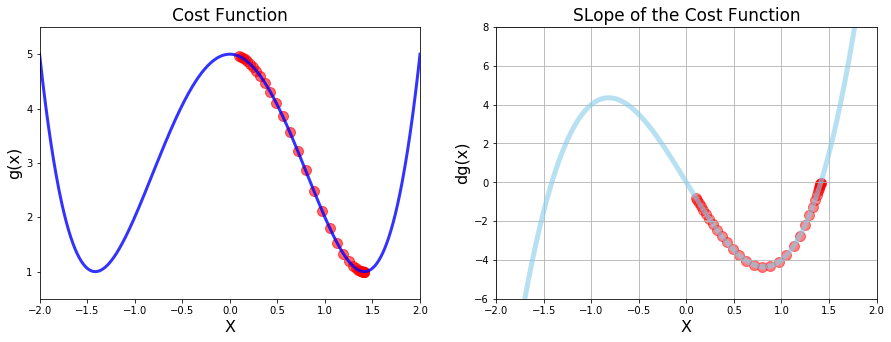

In [18]:
#calling Gradient descent function
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dg, initial_guess= 0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [15,5])

# 1 chart: cost function

plt.subplot(1,2,1) # arguements rows, columns , indexes

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

plt.plot(x_2, g(x_2), color='blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 chart : Derivative
plt.subplot(1,2,2)

plt.title('SLope of the Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])

plt.plot(x_2, dg(x_2), color = 'skyblue',linewidth =5, alpha =0.6)
plt.scatter(list_x, deriv_list, color ='red', s=100, alpha =0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 +2$$

### power rule $$\frac{d}{dx}x^n =nx^{n-1}$$ 

In [19]:
# Make Data

x_3 = np.linspace(start = -2.5, stop = 2.5, num=1000)


def h(x): 
    return x**5 -2*x**4 +2

def dh(x): 
    return 5*x**4-8*x**3 

##d/dxx^n =nx^(n-1) #power rule

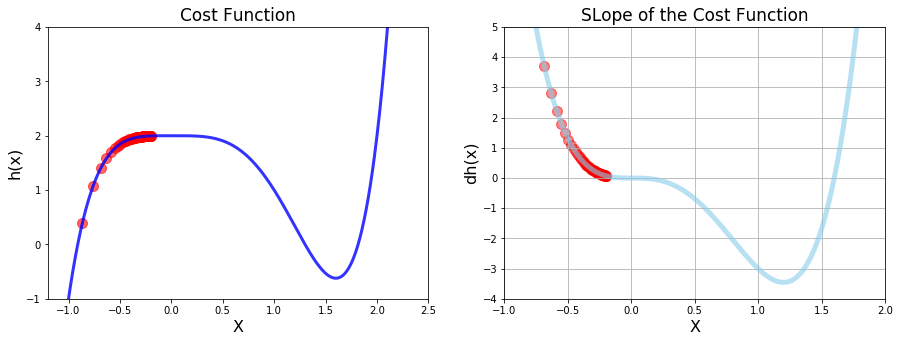

Local min occurs at -1.8398461123332792e+24
cost at this minimum is  -2.1081790694225687e+121
Number of steps 72


In [20]:
#calling Gradient descent function
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dh, initial_guess= -0.2, max_iter= 71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [15,5])

# 1 chart: cost function

plt.subplot(1,2,1) # arguements rows, columns , indexes

plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)

plt.plot(x_3, h(x_3), color='blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 chart : Derivative
plt.subplot(1,2,2)

plt.title('SLope of the Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dh(x)', fontsize = 16)
plt.grid()
plt.xlim([-1,2])
plt.ylim([-4,5])

plt.plot(x_3, dh(x_3), color = 'skyblue',linewidth =5, alpha =0.6)
plt.scatter(list_x, deriv_list, color ='red', s=100, alpha =0.5)

plt.show()

print('Local min occurs at', local_min)
print('cost at this minimum is ', h(local_min))
print('Number of steps', len(list_x))

In [21]:
import sys
#sys.version
#type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples 

In [22]:
# creating a tuple -tuple packing

breakfast = 'bacon','eggs', 'avacado'
unlucky_numbers = 13,4,9,26,17

print('I love', breakfast[0])
print('My hotel has no '+str(unlucky_numbers[1])+'th floor' )

#tuple heterogeneous (immutable)
not_my_address = 1, 'infinite loop', 'Cupertino', 95014

#breakfast.append('toast') #you can't do this!
#breakfast[3] = 'sausage' # you can't do this either. Gotta add those brackets.

tuple_with_single_value = 42, #note the comma

#sequence unpacking
main, side, greens = breakfast
print('Main course is', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps', len(data_tuple[1]))

I love bacon
My hotel has no 4th floor
Main course is bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps 117


# The Learning Rate

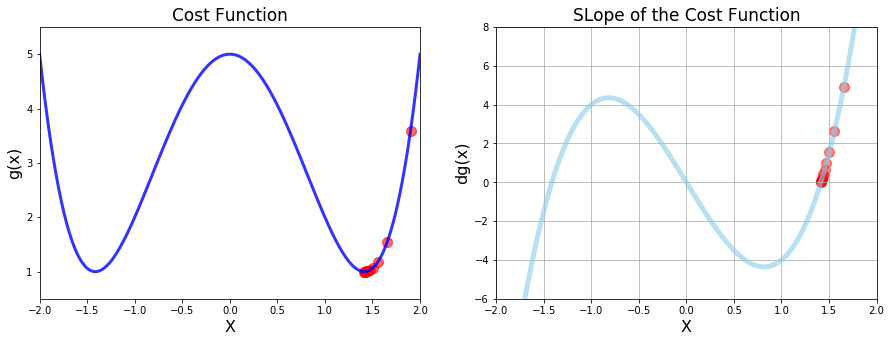

number of steps is 14
Local min occurs at 1.415879815113846
cost at this minimum is  1.0000222373629084


In [23]:
#calling Gradient descent function
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dg, initial_guess= 1.9, multiplier = 0.02, max_iter =500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [15,5])

# 1 chart: cost function

plt.subplot(1,2,1) # arguements rows, columns , indexes

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

plt.plot(x_2, g(x_2), color='blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 chart : Derivative
plt.subplot(1,2,2)

plt.title('SLope of the Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])

plt.plot(x_2, dg(x_2), color = 'skyblue',linewidth =5, alpha =0.6)
plt.scatter(list_x, deriv_list, color ='red', s=100, alpha =0.5)
[]
plt.show()

print('number of steps is', len(list_x))
print('Local min occurs at', local_min)
print('cost at this minimum is ', g(local_min))


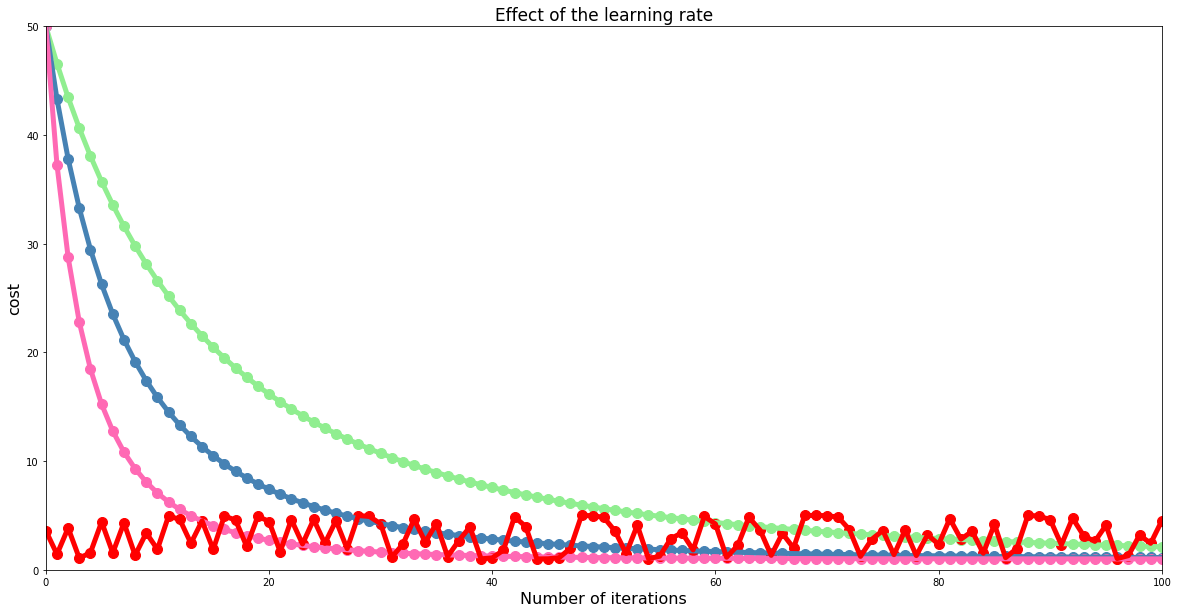

In [24]:
#Run Gradient descent three times
n=100
low_gamma = gradient_descent(
    derivative_func=dg, initial_guess= 3, multiplier = 0.0005, 
    precision = 0.0001, max_iter =n)

#Challenge plot two more learning rates:mid_gamma (0.001) high gamma(0.002)
mid_gamma = gradient_descent(
    derivative_func=dg, initial_guess= 3, multiplier = 0.001, 
    precision = 0.0001, max_iter =n)

high_gamma = gradient_descent(
    derivative_func=dg, initial_guess= 3, multiplier = 0.002, 
    precision = 0.0001, max_iter =n)

#experiment
insane_gamma = gradient_descent(
    derivative_func=dg, initial_guess= 1.9, multiplier = 0.25, 
    precision = 0.0001, max_iter =n)


#plotting reduction in cost for each interation.
plt.figure(figsize = [20, 10])

plt.xlim([0,n])
plt.ylim([0,50])
plt.title('Effect of the learning rate', fontsize = 17)
plt.xlabel('Number of iterations', fontsize = 16)
plt.ylabel('cost', fontsize = 16)

#values for our data
# 1) Y axis data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])

#2) x axis data: create a lits from 0 to n+1
iteration_list = list(range(0,n+1))

#plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth = 5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=100 )

#plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth = 5)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=100 )
            
#plotting high learning rate
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth = 5)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=100)  

#plotting insane learning rate
plt.plot(iteration_list, g(insane_values), color='red', linewidth = 5)
plt.scatter(iteration_list, g(insane_values), color='red', s=100)  

plt.show()

# Example 4  - Data Viz with 3D charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$


Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$


$$\frac{d}{dx}x^n =nx^{n-1}$$ 

In [25]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)
    

In [26]:
# make our x AND y data 

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of x array', x_4.shape)

x_4,y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid:', x_4.shape)

Shape of x array (200,)
Array after meshgrid: (200, 200)


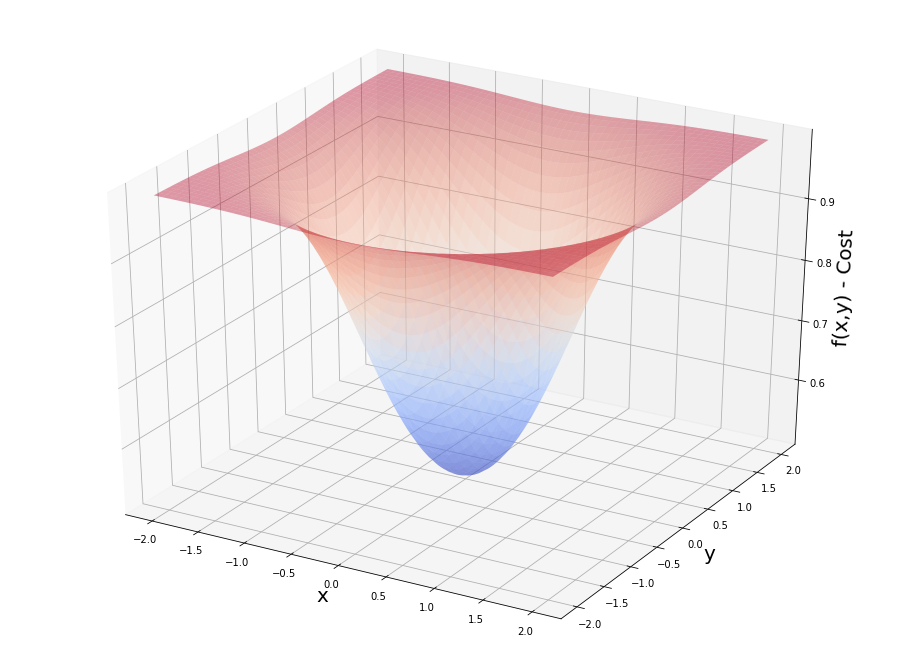

In [27]:
#generating 3d plot
fig = plt.figure(figsize= [16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('f(x,y) - Cost',fontsize=20)


ax.plot_surface(x_4 ,y_4, f(x_4, y_4), cmap=cm.coolwarm,  alpha = 0.4)
plt.show()

## Partial Derivatives and  Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 -y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$


## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 -y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$

In [28]:
a, b =symbols ('x, y')

print('our cost function f(x, y) is',f(a, b))
print('partial derivative wrt x is',diff(f(a,b), a))
print('The value of f(x,y) at x=1.8 and y=1.0 is:',
      f(a,b).evalf(subs={a:1.8,b:1.0}))

print('Value of partial derivative wrt x is',
      diff(f(a,b), a).evalf(subs={a:1.8,b:1.0}))

our cost function f(x, y) is 1/(3**(-x**2 - y**2) + 1)
partial derivative wrt x is 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
The value of f(x,y) at x=1.8 and y=1.0 is: 0.990604794032582
Value of partial derivative wrt x is 0.0368089716197505


## Batch Gradient Descent With SymPy

In [29]:
#setup 
multiplier = 0.1 
max_iter = 500
params = np.array([1.8,1.0]) #initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
#results
print('values in gradient array:', gradients)
print('Minimum Occurs at x value of:', params[0])
print('Minimum Occurs at y value of:', params[1])
print('The cost is:', f(params[0],params[1]))

values in gradient array: [2.01013037525579e-11 1.11673909736433e-11]
Minimum Occurs at x value of: 3.45838599885832e-11
Minimum Occurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


In [30]:
#partial derivative functions example 4
def fpx(x,y):
    r=3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2
     

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [31]:
#setup 
multiplier = 0.1 
max_iter = 500
params = np.array([1.8,1.0]) #initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
#results
print('values in gradient array:', gradients)
print('Minimum Occurs at x value of:', params[0])
print('Minimum Occurs at y value of:', params[1])
print('The cost is:', f(params[0],params[1]))

values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum Occurs at x value of: 3.458385998858304e-11
Minimum Occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays



In [32]:
#setup 
multiplier = 0.1 
max_iter = 200
params = np.array([1.8,1.0]) #initial guess
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis =0 )
    #same as this bellow
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
    
#results
print('values in gradient array:', gradients)
print('Minimum Occurs at x value of:', params[0])
print('Minimum Occurs at y value of:', params[1])
print('The cost is:', f(params[0],params[1]))

(1, 2)
values in gradient array: [0.00046144 0.00025636]
Minimum Occurs at x value of: 0.0007938985101347202
Minimum Occurs at y value of: 0.0004410547278526219
The cost is: 0.5000002265349848


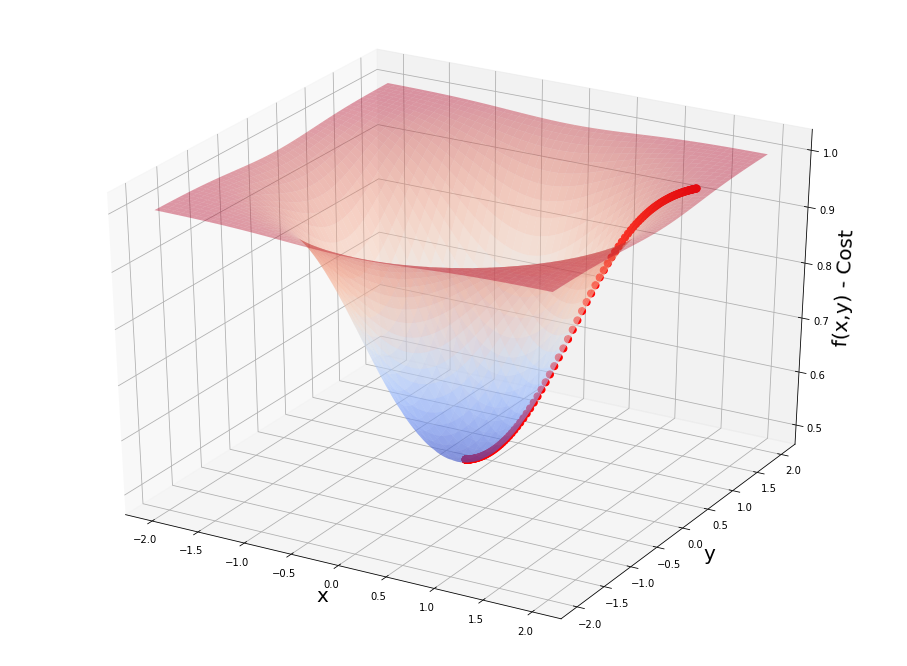

In [33]:
#generating 3d plot
fig = plt.figure(figsize= [16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('f(x,y) - Cost',fontsize=20)

ax.plot_surface(x_4 ,y_4, f(x_4, y_4), cmap=cm.coolwarm,  alpha = 0.4)
ax.scatter(values_array[:,0],values_array[:,1], f(values_array[:,0],
            values_array[:,1]), s=50 , color='red', alpha=1)

plt.show()

In [34]:
#advanced numpy array practice
print('indexes are in order of rows and columns')
kirk = np.array([['Captain','Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'],['Questlove','Drums']])
print(hs_band.shape)


print('hs_band[0]',hs_band[0])
print('hs_band[1][0]',hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0) 
print(the_roots)

the_roots = np.append(arr=the_roots, values= [['Malik B', 'MC']], axis =0)

# [:,0] means all rows and first column 
print('Printing nicknames...', the_roots[:,0]) 

print('Printing band roles.....',the_roots[:,1])

indexes are in order of rows and columns
(1, 2)
(2, 2)
hs_band[0] ['Black Thought' 'MC']
hs_band[1][0] Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain' 'Malik B']
Printing band roles..... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with Data & a Real Cost Function 

## Mean Squared Error: a cost function for regression problems. 

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$


### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [35]:
# make sample data

#two different ways to add a row or column
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [36]:
# quick linear regression

regr = LinearRegression()
regr.fit(x_5,y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])


Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


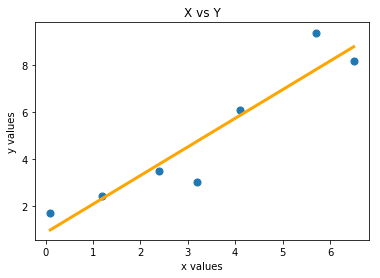

In [37]:
plt.scatter(x_5,y_5, s=50)
plt.plot(x_5,regr.predict(x_5),color = 'orange', linewidth = 3)

plt.xlabel('x values')
plt.ylabel('y values')
plt.title('X vs Y')
plt.show()

### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [38]:
#y_hat = theta0 + theta1 * x

y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5


print('Est values of y_hat are: \n', y_hat)
print('Actual values are: \n', y_5)

Est values of y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [39]:
def mse(y, y_hat):
    return (1/y.size)*sum((y_5 - y_hat)**2) 
        

In [40]:
mse(y_5, y_hat)

array([0.94796558])

In [41]:
## another way 

def mse(y, y_hat):
    return np.average((y_5 - y_hat)**2, axis= 0)


In [42]:
print('Manually calculated MSE is:', mse(y_5, y_hat)) 
print('MSE regression using manual cal is:', mean_squared_error(y_5, y_hat))
print('MSE regression is:', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual cal is: 0.9479655759794577
MSE regression is: 0.9479655759794577


# 3D Plot for the MSE Cost Function
## Make Data For Thetas

In [43]:
nr_thetas = 200
th_0 =np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 =np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using for loops 

In [44]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat = plot_t0[i][j]+ plot_t1[i][j]*x_5
        plot_cost[i][j] =  mse(y_5, y_hat)
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [45]:
#nested loop practice

for i in range(3):
    for j  in range(3):
        print(f'value of i is {i}, and the value of j is {j}.')

value of i is 0, and the value of j is 0.
value of i is 0, and the value of j is 1.
value of i is 0, and the value of j is 2.
value of i is 1, and the value of j is 0.
value of i is 1, and the value of j is 1.
value of i is 1, and the value of j is 2.
value of i is 2, and the value of j is 0.
value of i is 2, and the value of j is 1.
value of i is 2, and the value of j is 2.


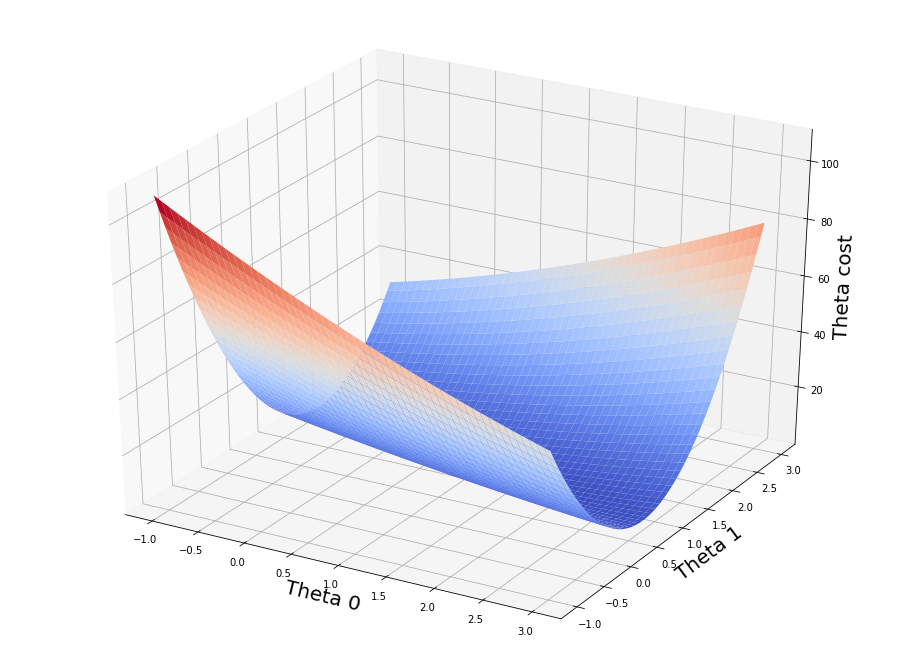

In [46]:
# plotting MSE 

fig = plt.figure(figsize=[16,12]) 
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Theta cost',fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.coolwarm,  alpha = 1)


plt.show()

In [55]:
print('Min value of plot cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape= plot_cost.shape)
print('min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]:', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]:', plot_t1[111][91])

Min value of plot cost 0.9483826526747164
min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]: 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91]: 1.2311557788944723


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)\big(x^{(i)}\big)$$

## MSE & Gradient Descent

In [67]:
# x values, y values, array of theta paramaters 

#(theta0 at index 0 and theta1 at index 1) 

def grad(x,y,thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y-thetas[0]-thetas[1]*x)
    theta1_slope = (-2/n) * sum((y-thetas[0]-thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values= theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [71]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

#collect data points for scatter plot
plot_vals = thetas.reshape (1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    #append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0]+thetas[1]*x_5))
    
#results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0]+thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


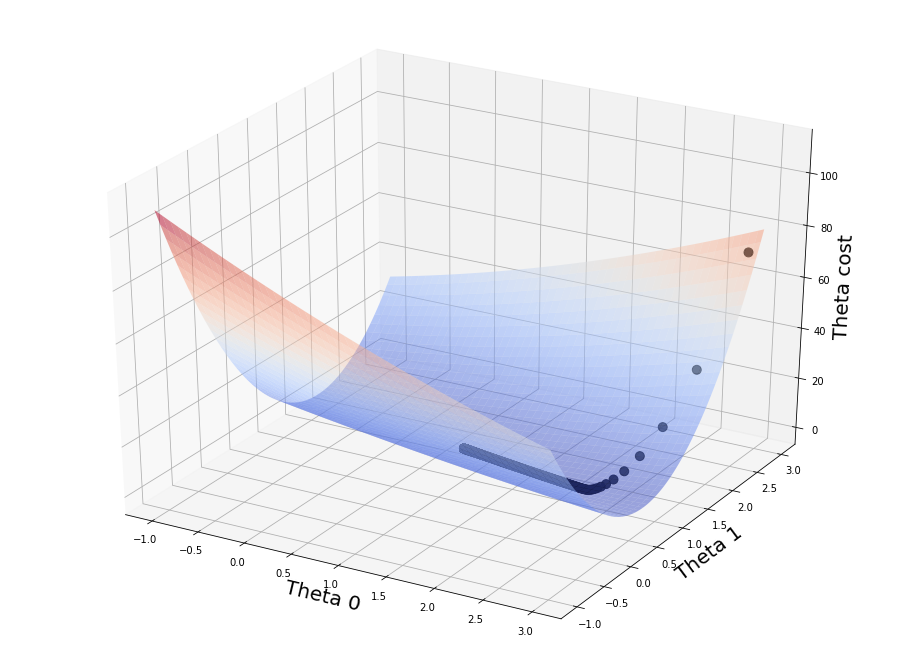

In [78]:
# plotting MSE 

fig = plt.figure(figsize=[16,12]) 
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Theta cost',fontsize=20)

ax.scatter(plot_vals[:,0], plot_vals[:,1], mse_vals, s=80, color="black")
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.coolwarm,  alpha = 0.5)


plt.show()